# Computational and Numerical Methods
## Group 16
### Set 6 (10-09-2018):   Lagrange and Newton Interpolation
#### Parth Shah      201601086
#### Vidhin Parmar   201601003

<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy.interpolate import lagrange as l
from sympy import *

def plot(x, y,lab):
    plt.plot(x, y, label=lab)
    plt.grid(True)
    plt.legend(loc='best')
    plt.show()

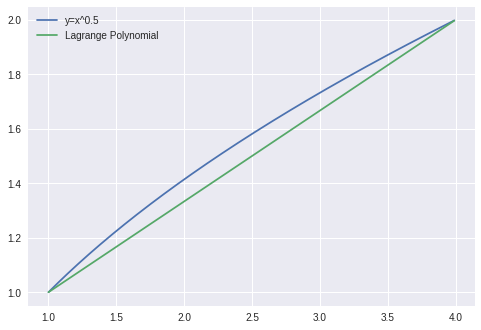

Order of the Lagrange polynomial is 1.
 
0.3333 x + 0.6667


In [87]:
x = np.array([1, 4])
y = np.array([1, 2])
poly = l(x, y)
xp = np.arange(0,5,0.01)
plt.plot(xp, xp**(0.5), label="y=x^0.5")
plt.plot(xp, poly(xp), label="Lagrange Polynomial")
plt.grid(True)
plt.legend(loc='best')
plt.show()
print("Order of the Lagrange polynomial is " + str(poly.order) + ".")
print(poly)

Order of the Lagrange polynomial is 1.
The Lagrange polynomial is  
2.282 x + 0.3993


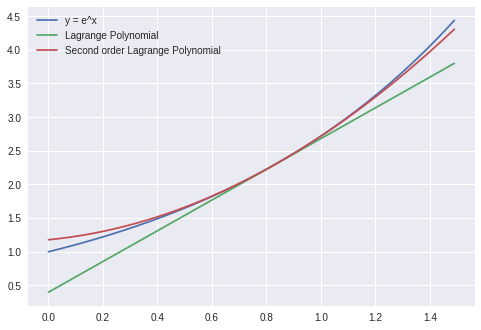

Order of the Lagrange polynomial is 2.
       2
1.145 x + 0.3926 x + 1.179


In [85]:
x = np.array([0.82, 0.83])
y = np.array([2.270500, 2.293319])
poly = l(x, y)
xp = np.arange(0, 1.5, 0.01)
plt.plot(xp, np.exp(xp), label="y = e^x")
plt.plot(xp, poly(xp), label="Lagrange Polynomial")

print("Order of the Lagrange polynomial is " + str(poly.order) + ".")
print(poly)

x = np.array([0.82, 0.83, 0.84])
y = np.array([2.270500, 2.293319,2.316367])
poly = l(x, y)
plt.plot(xp, poly(xp), label="Second order Lagrange Polynomial")
plt.grid(True)
plt.legend(loc='best')
plt.show()

print("Order of the Lagrange polynomial is " + str(poly.order) + ".")
print(poly)

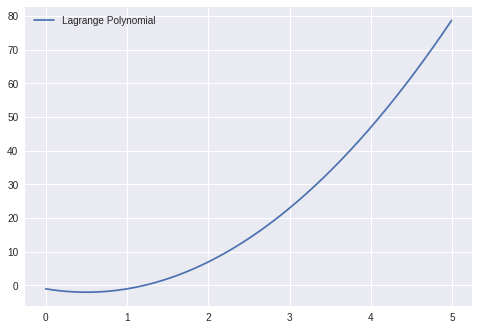

Order of the Lagrange polynomial is 2.
   2
4 x - 4 x - 1


In [88]:
x = np.array([0, 1, 2])
y = np.array([-1, -1, 7])
poly = l(x, y)
xp = np.arange(0,5,0.01)
plt.plot(xp, poly(xp), label="Lagrange Polynomial")
plt.grid(True)
plt.legend(loc='best')
plt.show()
print("Order of the Lagrange polynomial is " + str(poly.order) + ".")
print(poly)